# Ejercicios de seguridad hídrica

__Índice__<br>

__[Ejercicio 2](#Ejercicio-2)__<br>
[Método gráfico](#Método-gráfico)<br>
[Método analítico](#Método-analítico)<br>

__[Ejercicio 3](#Ejercicio-3)__<br>
[Serie de 2 años](#Serie-de-2-años)<br>
[Serie de 6 años](#Serie-de-6-años)<br>

__[Ejercicio 4](#Ejercicio-4)__<br>
[Sin embalse](#Sin-embalse)<br>
[Embalse de 50 hm³](#Embalse-de-50-hm³)<br>
[Dimensionar el embalse](#Dimensionar-el-embalse)<br>

__[Ejercicio 5](#Ejercicio-5)__<br>
[Demanda conjunta](#Demanda-conjunta)<br>
[Demandas independientes](#Demandas-independientes)<br>
[Dimensionar embalse](#Dimensionar-embalse)<br>

__[Ejercicio 6](#Ejercicio-6)__<br>
[Standard precipitation index: SPI](#Standard-precipitation-index:-SPI)<br>
[Standard precipitation-evapotranspiration index: SPEI](#Standard-precipitation-evapotranspiration-index:-SPEI)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## <font color=steelblue>Ejercicio 2
<font color=steelblue>En el embalse del Cuervo, en la zona de regadíos del Guadiamar, se tienen las aportaciones anuales mostradas en la tabla 1. Se necesita regar 4500 ha con una dotación anual de 800 m³/ha, es decir, una demanda de 36 hm³/año. Aumiendo un embalse con una capacidad de 50 hm³ inicialmente vacío, se pide calcular:
*  El número de años en que se vierte.
*  El número de años en que se presta un servicio insuficiente.
*  El volumen total de agua vertida por el aliviadero.
*  El volumen total de déficit de agua.
*  Las garantías de regulación y suministro.
*  El volumen de agua que queda en el embalse al final del periodo.
*  El porcentaje de agua utilizada.

_**Tabla 1**. Serie de aportaciones anuales al embalse del Cuervo en hm³._

| Año     | Apor. (hm³) | Año     | Apor. (hm³) | Año     | Apor. (hm³) |
|---------|-------------|---------|-------------|---------|-------------|
| 1930-31 | 41.5        | 1940-41 | 69.4        | 1950-51 | 16.0        |
| 32      | 50.3        | 42      | 38.3        | 52      | 20.0        |
| 33      | 64.5        | 43      | 63.2        | 53      | 47.6        |
| 34      | 39.6        | 44      | 34.9        | 54      | 29.5        |
| 35      | 24.0        | 45      | 16.6        | 55      | 33.5        |
| 36      | 121.9       | 46      | 57.8        | 56      | 69.7        |
| 37      | 38.0        | 47      | 63.6        | 57      | 23.2        |
| 38      | 28.5        | 48      | 46.0        | 58      | 21.8        |
| 39      | 38.0        | 49      | 24.6        | 59      | 56.8        |
| 40      | 83.0        | 50      | 28.4        | 60      | 51.5        |


In [2]:
# Datos
A = 4500 # ha
Da = 8000 # m³/ha
D = Da * A * 1e-6 # hm³/a
Vc = 50 # hm³
Vo = 0 # hm³

In [3]:
# importar serie de aportación
data2 = pd.read_csv('Tabla 1.csv', encoding='latin-1', index_col=0)
data2.index.name = 'year'
data2.columns = ['aportacion']

# crear serie de demanda
data2['demanda'] = D

### Método gráfico
#### Curva de caudales
Representa la serie anual de caudal, ya sea aportación o demanda

nº de años con déficit: 12


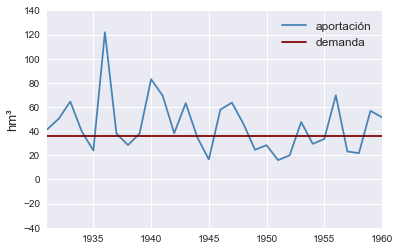

In [4]:
plt.plot(data2.aportacion, color='steelblue', label='aportación')
plt.plot(data2.demanda, color='maroon', label='demanda')

plt.xlim(1931, 1960)
plt.ylim(-40, 140)
plt.ylabel('hm³', fontsize=13)
plt.legend(fontsize=12);
 
n_deficit = ((data2.aportacion - data2.demanda) < 0).sum()
print('nº de años con déficit: {0}'.format(n_deficit))

Si no hubiera embalse, los años en que la serie de aportación es inferior a la serie de demanda corresponderían a años con déficit, sumando un total de 12 años sobre los 30 años de serie.

#### Curva de caudales acumulados
Para poder tener en cuenta la acumulación de caudal entre diversos años, debe usarse la serie de caudales acumulados. Con esta serie se puede comprobar si hay un déficit crónico del recurso, o si a largo plazo existe recurso suficiente para cubrir la demanda.

In [5]:
# calcular la serie de caudales acumulados
data21 = data2.copy()
data21['Aacum'] = data2.aportacion.cumsum()
data21['Dacum'] = data2.demanda.cumsum()

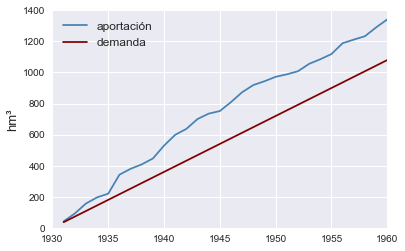

In [6]:
plt.plot(data21.Aacum, color='steelblue', label='aportación')
plt.plot(data21.Dacum, color='maroon', label='demanda')

plt.xlim(1930, 1960)
plt.ylim(0, 1400)
plt.ylabel('hm³', fontsize=13)
plt.legend(fontsize=12);

En la gráfica de las series acumuladas se comprueba que a medio plazo la aportación es superior a la demanda. Por tanto, la regulación por medio de un embalse permitiría reducir el déficit en la oferta.

#### Curva de diferencia de cuadales acumulados
Para evitar el problema de que la curva de caudales acumulados es siempre creciente y por tanto difícil de manejar, se calcula la diferencia entre dicha curva y un caudal de referencia (generalmente el caudal medio).

In [7]:
# establecer el caudal de referencia
Qref = round(data2.aportacion.mean(), 0)
print('Qref = {0:.0f} hm³/año'.format(Qref))
data2['Qref'] = Qref

# diferencias acumuladas de la aportación
data21['Adifacum'] = data21['Aacum']
data21.loc[1931:, 'Adifacum'] -= data2.Qref.cumsum()

# diferencias acumuladas de la demanda
data21['Ddifacum'] = data21['Dacum']
data21.loc[1931:, 'Ddifacum'] -= data2.Qref.cumsum()

data21.head()

Qref = 45 hm³/año


,aportacion,demanda,Aacum,Dacum,Adifacum,Ddifacum
year,,,,,,
1931,41.5,36.0,41.5,36.0,-3.5,-9.0
1932,50.3,36.0,91.8,72.0,1.8,-18.0
1933,64.5,36.0,156.3,108.0,21.3,-27.0
1934,39.6,36.0,195.9,144.0,15.9,-36.0
1935,24.0,36.0,219.9,180.0,-5.1,-45.0


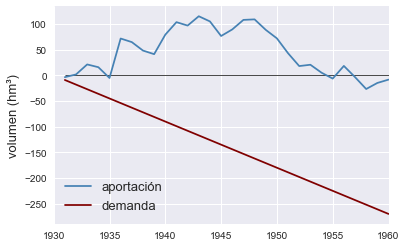

In [8]:
plt.plot(data21.Adifacum, color='steelblue', label='aportación')
plt.plot(data21.Ddifacum, color='maroon', label='demanda')
plt.hlines(0, 1931, 1960, 'k', linewidth=0.7)

plt.xlim(1930, 1960)
#plt.ylim(-200, 500)
plt.ylabel('volumen (hm³)', fontsize=13)
plt.legend(fontsize=13);

#### Curva de demanda servida 
Esta curva representa el caudal efectivamente servido, en vez del demandado que se exponía en la curva anterior. Para ello, los meses en los que la aportación supera a la demanda, se mantiene el valor de la demanda, y los meses en los que la aportación no cubre la demanda, se otorga el valor de la aportación.

In [9]:
data21['Dservida'] = 0

for i, year in enumerate(data21.index):
    # demanda servida el paso anterior
    if i == 0:
        d = 0
    else:
        d = data21.loc[year - 1, 'Dservida']
    
    # demanda servida en el paso de estudio
    if data2.loc[year, 'demanda'] <= data2.loc[year, 'aportacion']:
        data21.loc[year, 'Dservida'] = d + data2.loc[year, 'demanda'] - Qref 
    else:
        data21.loc[year, 'Dservida'] = d + data2.loc[year, 'aportacion'] - Qref 

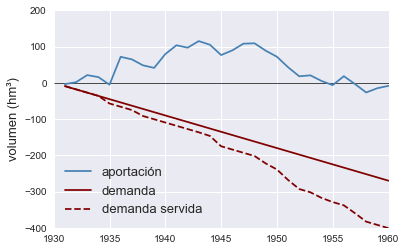

In [10]:
plt.plot(data21.Adifacum, color='steelblue', label='aportación')
plt.plot(data21.Ddifacum, color='maroon', label='demanda')
plt.plot(data21.Dservida, '--', color='maroon', label='demanda servida')
plt.hlines(0, 1930, 1960, 'k', linewidth=0.7)

plt.xlim(1930, 1960)
plt.ylim(-400, 200)
plt.ylabel('volumen (hm³)', fontsize=13)
plt.legend(fontsize=13);

#### Simulación de la explotación del embalse
La capacidad del embalse se representa mediante dos paralelas de la curva de aportación a una distancia igual a la capacidad del embalse. Entre estas dos curvas se representa la curva de volumen embalsado. Esta curva es paralela a la curva de demanda siempre y cuando no corte a las dos curvas que representan la capacidad del embalse, en cuyo caso es coincidente con aquélla de dichas curvas que intersecte.

In [11]:
# curva de embalse vacío: aportación + capacidad del embalse
data21['vacio'] = data21['Adifacum'] + Vc
# curva de volumen embalsado
data21['vaciado'] = Vc
# curva de caudal vertido por aliviadero/desagüe
data21['vertido'] = np.nan
# curva de caudal deficitario
data21['deficit'] = np.nan

for i, year in enumerate(data21.index):
    # definir el valor hipotético de la curva de volumen embalsado sin tener en cuenta si el embalse se llena o vacía
    if i == 0:
        aux = Vo + data2.loc[year, 'demanda'] - Qref
    else:
        aux = data21.loc[year - 1, 'vaciado'] + data2.loc[year, 'demanda'] - Qref
    
    # corregir la curva de volumen embalsado en función del llenado/vaciado
    if aux > data21.loc[year, 'vacio']: # si se vacía el embalse
        data21.loc[year, 'vaciado'] = data21.loc[year, 'vacio']
        data21.loc[year, 'deficit'] = aux - data21.loc[year, 'vacio']
    elif aux < data21.loc[year, 'Adifacum']: # si se llena el embalse
        data21.loc[year, 'vaciado'] = data21.loc[year, 'Adifacum']
        data21.loc[year, 'vertido'] = data21.loc[year, 'Adifacum'] - aux
    else:
        data21.loc[year, 'vaciado'] = aux

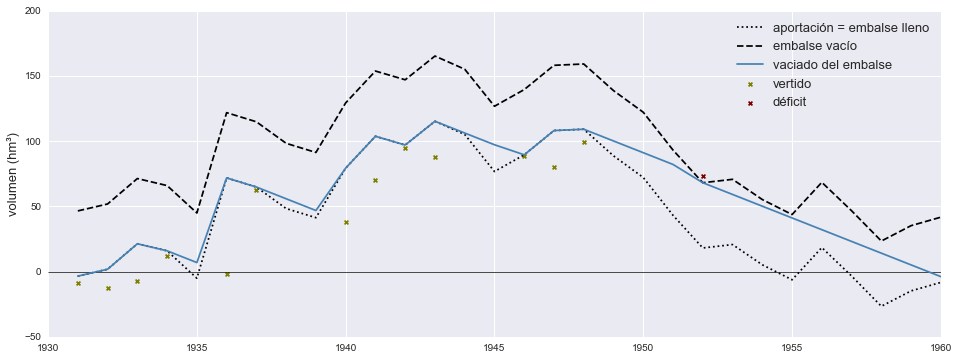

In [12]:
fig, ax = plt.subplots(figsize=(16, 6))

# Curva de embalse lleno
plt.plot(data21.Adifacum, ':', color='k', label='aportación = embalse lleno')
# curva de embalse vacío
plt.plot(data21.vacio, '--', color='k', label='embalse vacío')
# curva de vaciado del embalse
plt.plot(data21.vaciado, color='steelblue', label='vaciado del embalse')
# vertidos
vertido = data21.vertido[data21.vertido.notnull()]
vertido = data21.loc[vertido.index, 'Adifacum'] - vertido
plt.scatter(vertido.index, vertido, s=15, c='olive', marker='x', label='vertido')
# déficits
deficit = data21.deficit[data21.deficit.notnull()]
deficit = data21.loc[deficit.index, 'vacio'] + deficit
plt.scatter(deficit.index, deficit, s=15, c='maroon', marker='x', label='déficit')
# horizontal en y=0
plt.hlines(0, 1930, 1960, 'k', linewidth=0.7)

plt.xlim(1930, 1960)
plt.ylim(-50, 200)
plt.ylabel('volumen (hm³)', fontsize=13)
plt.legend(fontsize=13);

#### Resultados

In [13]:
n_vertido = (data21.vertido > 0).sum()
print('nº años con vertido: {0}'.format(n_vertido))

n_deficit = (data21.deficit > 0).sum()
print('nº años con déficit: {0}'.format(n_deficit))

Vvertido = data21.vertido.sum()
print('volumen total vertido: {0:.0f} hm³'.format(Vvertido))

Vdeficit = data21.deficit.sum()
print('volumen total deficitario: {0:.0f} hm³'.format(Vdeficit))

Gr = 1 - n_deficit / data21.shape[0]
print('garantía de regulación: {0:.2f} %'.format(Gr * 100))

Gs = 1 - Vvertido / data2.demanda.sum()
print('garantía de suministro: {0:.2f} %'.format(Gs * 100))

Vf = data21.vacio[1960] - data21.vaciado[1960]
print('volumen embalsado al final del periodo: {0:.1f} hm³'.format(Vf))

Autilizada = 1 - data21.vertido.sum() / data2.aportacion.sum()
print('porcentaje de agua utilizada: {0:.1f} %'.format(100 * Autilizada))

nº años con vertido: 13
nº años con déficit: 1
volumen total vertido: 271 hm³
volumen total deficitario: 5 hm³
garantía de regulación: 96.67 %
garantía de suministro: 74.90 %
volumen embalsado al final del periodo: 45.6 hm³
porcentaje de agua utilizada: 79.8 %


### Método analítico
El método analítico aplica los mismos conceptos anteriormente explicados para el método gráfico, pero de una forma más cómoda cuando se utilizan medios de cálculo como el ordenador. Se evita la complicación de trabajar con caudales acumulados y tener que restar estos por un caudal de referencia.

In [14]:
# serie diferencia entre aportación y demanda
data2['neto'] = data2.aportacion - data2.demanda

data2.head()

,aportacion,demanda,Qref,neto
year,,,,
1931,41.5,36.0,45.0,5.5
1932,50.3,36.0,45.0,14.3
1933,64.5,36.0,45.0,28.5
1934,39.6,36.0,45.0,3.6
1935,24.0,36.0,45.0,-12.0


In [15]:
# serie de volumen en el embalse
data2['embalsado'] = 0
# serie de caudal deficitario
data2['deficit'] = 0
# serie de caudal vertido
data2['vertido'] = 0

for i, year in enumerate(data2.index):
    if i == 0:
        Vaux = Vo + data2.loc[year, 'neto']
    else:
        Vaux = data2.loc[year - 1, 'embalsado'] + data2.loc[year, 'neto']
    if Vaux < 0:
        data2.loc[year, 'deficit'] = - Vaux
    elif Vaux > Vc:
        data2.loc[year, 'embalsado'] = Vc
        data2.loc[year, 'vertido'] = Vaux - Vc
    else:
        data2.loc[year, 'embalsado'] = Vaux
        
data2.head()

,aportacion,demanda,Qref,neto,embalsado,deficit,vertido
year,,,,,,,
1931,41.5,36.0,45.0,5.5,5.5,0.0,0.0
1932,50.3,36.0,45.0,14.3,19.8,0.0,0.0
1933,64.5,36.0,45.0,28.5,48.3,0.0,0.0
1934,39.6,36.0,45.0,3.6,50.0,0.0,1.9
1935,24.0,36.0,45.0,-12.0,38.0,0.0,0.0


In [16]:
def plot_embalse(df, Vc, xlim=None, round=10):
    
    fig, ax = plt.subplots(ncols=2, figsize=(16, 6), sharex=True, sharey=True)

    ax[0].plot(df.demanda, c='maroon', label='demanda')
    ax[0].plot(df.aportacion, c='steelblue', label='aportación')
    x, y1, y2 = df.index, df.demanda, df.aportacion
    ax[0].fill_between(x, y1, y2, where=y2 >= y1, interpolate=True,
                       facecolor='steelblue', alpha=0.3, label='exceso')
    ax[0].fill_between(x, y1, y2, where=y2 <= y1, interpolate=True,
                       facecolor='maroon', alpha=0.3, label='déficit')
    if xlim == None:
        xlim = (1, df.shape[0])
    ymax = np.ceil(df.max().max() / round) * round
    ax[0].set(xlim=xlim, ylim=(0, ymax))
    ax[0].set_ylabel('volumen (hm³)', fontsize=13)
    ax[0].legend(fontsize=12)
    ax[0].set_title('aportación vs demanda sin regular', fontsize=14,
                   fontweight='bold')


    ax[1].fill_between(df.index, df.embalsado, label='embalsado',
                       color='steelblue', alpha=0.3)
    ax[1].fill_between(df.index, df.embalsado, Vc, label='capacidad',
                       color='k', alpha=0.3)
    deficit = df.deficit[df.deficit > 0]
    ax[1].scatter(deficit.index, deficit, s=15, marker='x', c='maroon', label='déficit')
    vertido = df.vertido[df.vertido > 0]
    ax[1].scatter(vertido.index, vertido, s=15, marker='x', c='steelblue', label='vertido')
    ax[1].set_ylabel('volumen (hm³)', fontsize=13)
    ax[1].set_title('aportación vs demanda regulado', fontsize=14,
                   fontweight='bold')
    ax[1].legend(fontsize=12);

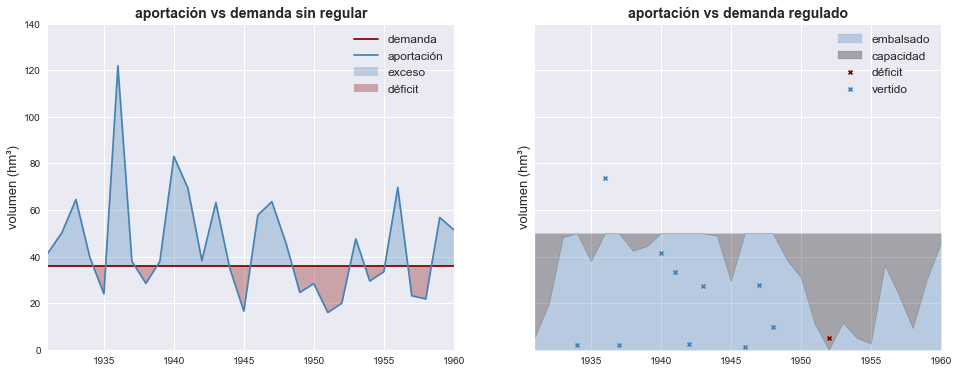

In [17]:
plot_embalse(data2, Vc, xlim=(1931, 1960), round=20)

In [18]:
n_vertido = (data2.vertido > 0).sum()
print('nº años con vertido: {0}'.format(n_vertido))

n_deficit = (data2.deficit > 0).sum()
print('nº años con déficit: {0}'.format(n_deficit))

Vvertido = data2.vertido.sum()
print('volumen total vertido: {0} hm³'.format(Vvertido))

Vdeficit = data2.deficit.sum()
print('volumen total deficitario: {0} hm³'.format(Vdeficit))

Gr = 1 - n_deficit / data2.shape[0]
print('garantía de regulación: {0:.2f} %'.format(Gr * 100))

Gs = 1 - Vvertido / data2.demanda.sum()
print('garantía de suministro: {0:.2f} %'.format(Gs * 100))

print('volumen embalsado al final del periodo: {0:.1f} hm³'.format(data2.embalsado[1960]))

Au = 1 - data2.vertido.sum() / data2.aportacion.sum()
print('porcentaje de agua utilizada: {0:.2f} %'.format(100 * Au))

nº años con vertido: 10
nº años con déficit: 1
volumen total vertido: 221.1 hm³
volumen total deficitario: 5.0 hm³
garantía de regulación: 96.67 %
garantía de suministro: 79.53 %
volumen embalsado al final del periodo: 45.6 hm³
porcentaje de agua utilizada: 83.52 %


## <font color=steelblue>Ejercicio 3
<font color=steelblue>A un embalse de 100 hm³ de capacidad llegan en un periodo de dos años las aportaciones mensuales mostradas en la tabla 2. La ley de la demanda es la siguiente:
*  De octubre a marzo: 50 hm³/mes
*  De abril a septiembre: 90 hm³/mes

Asumiendo un embalse vacío al inicio del periodo, se pide:
*  Determinar en el citado periodo las garantías de suministro y regulación a nivel mensual.
*  Obtener la capacidad que se le hubiese tenido que dar al embalse para satisfacer la citada demanda con una garantía de regulación del 80%.

Si las aportaciones se repitiesen de igual manera durante seis años consecutivos, ¿cómo cambiarían las garantías y la capacidad necesaria de embalse?

_**Tabla 2**. Serie de aportaciones mensuales al embalse en hm³._

| mes | año 1 | año 2 |
|-----|-------|-------|
| oct | 18.8  | 23.3  |
| nov | 216.4 | 18.2  |
| dic | 161.2 | 37.0  |
| ene | 46.9  | 63.5  |
| feb | 145.1 | 43.3  |
| mar | 181.3 | 154.8 |
| abr | 201.7 | 84.3  |
| may | 65.1  | 49.3  |
| jun | 94.9  | 24.9  |
| jul | 26.3  | 17.7  |
| ago | 19.3  | 7.2   |
| sep | 17.6  | 9.9   |

In [19]:
# Capacidad y volumen inicial del embalse
Vc = 100 # hm³
Vo = 0  # hm³

# series de aportación y demanda
A = pd.read_csv('Tabla 2.csv', index_col=0).aportacion
A.index = np.arange(1, A.shape[0] + 1)
D = pd.Series(data=[50, 50, 50, 50, 50, 50, 90, 90, 90, 90, 90, 90] * 2, index=A.index)
data3 = pd.concat((A, D), axis=1)
data3.columns = ['aportacion', 'demanda']

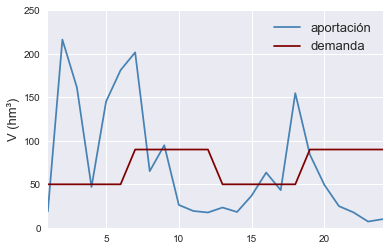

In [20]:
plt.plot(A, color='steelblue', label='aportación')
plt.plot(D, color='maroon', label='demanda')

plt.xlim(1, 24)
plt.ylim(0, 250)
plt.ylabel('V (hm³)', fontsize=13)
plt.legend(fontsize=13);

### Serie de 2 años
#### Garantías de regulación y suministro

In [21]:
data3['neto'] = data3.aportacion - data3.demanda
data3['embalsado'] = np.nan
data3['vertido'] = 0
data3['deficit'] = 0

for i, mes in enumerate(data3.index):
    if i == 0:
        aux = Vo + data3.loc[mes , 'neto']
    else:
        aux = data3.loc[mes - 1, 'embalsado'] + data3.loc[mes , 'neto']
    if aux > Vc:
        data3.loc[mes, 'embalsado'] = Vc
        data3.loc[mes, 'vertido'] = aux - Vc
    elif aux < 0:
        data3.loc[mes, 'embalsado'] = 0
        data3.loc[mes, 'deficit'] = - aux
    else:
        data3.loc[mes, 'embalsado'] = aux

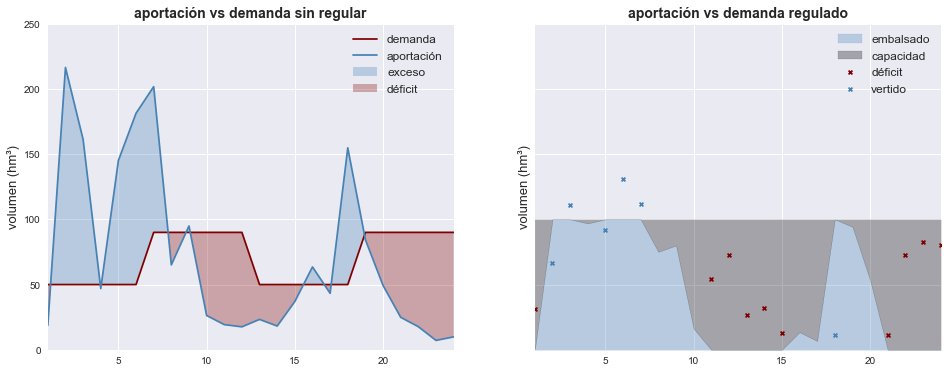

In [22]:
plot_embalse(data3, Vc, round=50)

In [23]:
n_deficit = (data3.deficit > 0).sum()
Gr = 1 - n_deficit / data3.shape[0]
print('garantía de regulación: {0:.2f} %'.format(Gr * 100))

Vvertido = data3.vertido.sum()
Gs = 1 - Vvertido / data3.demanda.sum()
print('garantía de suministro: {0:.2f} %'.format(Gs * 100))

garantía de regulación: 58.33 %
garantía de suministro: 68.80 %


In [24]:
def regulacion(aportacion, demanda, Vc, Vo, Gr=True):
    """
    
    """
    
    df = pd.concat((aportacion, demanda), axis=1)
    df.columns = ['aportacion', 'demanda']
    df['neto'] = df.aportacion - df.demanda
    df['embalsado'] = np.nan
    df['vertido'] = 0
    df['deficit'] = 0
    for i, mes in enumerate(df.index):
        if i == 0:
            aux = Vo + df.loc[mes, 'neto']
        else:
            aux = df.loc[mes - 1, 'embalsado'] + df.loc[mes , 'neto']
        if aux > Vc:
            df.loc[mes, 'embalsado'] = Vc
            df.loc[mes, 'vertido'] = aux - Vc
        elif aux < 0:
            df.loc[mes, 'embalsado'] = 0
            df.loc[mes, 'deficit'] = - aux
        else:
            df.loc[mes, 'embalsado'] = aux
    
    if Gr == True:
        # garantía de regulación
        n_deficit = (df.deficit > 0).sum()
        Gr = 1 - n_deficit / df.shape[0]
        return df, Gr
    else:
        return df

#### Dimensionar embalse

In [25]:
# Volumen inicial que no cumple el objetivo de garantía
Vn = [Vc]
df, gr = regulacion(data3.aportacion, data3.demanda, Vn[-1], 0)
Gr = [gr]
print('Vn = {0:.1f} hm³\tGr = {1:.2f} %'.format(Vn[-1], Gr[-1] * 100))

Vn = 100.0 hm³	Gr = 58.33 %


In [26]:
# Otro valor de volumen que excede el objetivo de garantía
Vn.append(400)
df, gr = regulacion(data3.aportacion, data3.demanda, Vn[-1], 0)
Gr.append(gr)
print('Vn = {0:.1f} hm³\tGr = {1:.2f} %'.format(Vn[-1], Gr[-1] * 100))

Vn = 400.0 hm³	Gr = 87.50 %


Vn = 250.0 hm³	Gr = 70.83 %
Vn = 325.0 hm³	Gr = 83.33 %
Vn = 287.5 hm³	Gr = 79.17 %


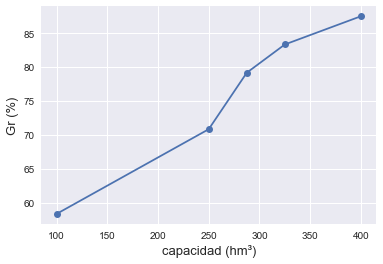

In [27]:
# valor objetivo de la garantía
obj = 0.8
# valor aceptado del error
error = 0.01

# Aplicar Newton-Raphson
while abs(Gr[-1] - obj) > error:
    if (Gr[-1] - obj) * (Gr[-2] - obj) < 0:
        Vn.append((Vn[-1] + Vn[-2]) / 2)
    elif (Gr[-1] - obj) * (Gr[-3] - obj) < 0:
        Vn.append((Vn[-1] + Vn[-3]) / 2)
    df, gr = regulacion(data3.aportacion, data3.demanda, Vn[-1], 0)
    Gr.append(gr)
    print('Vn = {0:.1f} hm³\tGr = {1:.2f} %'.format(Vn[-1], Gr[-1] * 100))

VGr = pd.concat((pd.Series(Vn), pd.Series(Gr)), axis=1)
VGr.columns = ['Vn', 'Gr']
VGr.sort_values('Vn', inplace=True)
plt.plot(VGr.Vn, VGr.Gr * 100, marker='o')
plt.xlabel('capacidad (hm³)', fontsize=13)
plt.ylabel('Gr (%)', fontsize=13);

Se requiere un embalse de capacidad 287.5 hm³ para garantizar una garantía de regulación del 80%.

### Serie de 6 años
#### Garantías de regulación y suministro

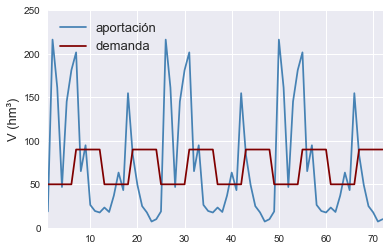

In [28]:
# generar la serie de 6 años 
data32 = pd.concat([data3.loc[:, ['aportacion', 'demanda']]] * 3, axis=0)
data32.index = np.arange(1, data32.shape[0] + 1)

plt.plot(data32.aportacion, color='steelblue', label='aportación')
plt.plot(data32.demanda, color='maroon', label='demanda')

plt.xlim(1, 72)
plt.ylim(0, 250)
plt.ylabel('V (hm³)', fontsize=13)
plt.legend(fontsize=13);

In [29]:
data32['neto'] = data32.aportacion - data32.demanda
data32['embalsado'] = np.nan
data32['vertido'] = 0
data32['deficit'] = 0

for i, mes in enumerate(data32.index):
    if i == 0:
        aux = Vo + data32.loc[mes , 'neto']
    else:
        aux = data32.loc[mes - 1, 'embalsado'] + data32.loc[mes , 'neto']
    if aux > Vc:
        data32.loc[mes, 'embalsado'] = Vc
        data32.loc[mes, 'vertido'] = aux - Vc
    elif aux < 0:
        data32.loc[mes, 'embalsado'] = 0
        data32.loc[mes, 'deficit'] = - aux
    else:
        data32.loc[mes, 'embalsado'] = aux

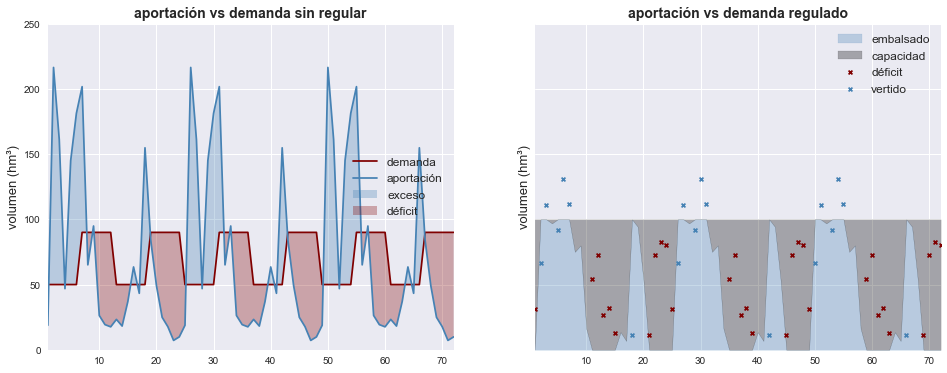

In [30]:
plot_embalse(data32, Vc, round=50)

In [31]:
n_deficit = (data32.deficit > 0).sum()
Gr = 1 - n_deficit / data32.shape[0]
print('garantía de regulación: {0:.2f} %'.format(Gr * 100))

Vvertido = data32.vertido.sum()
Gs = 1 - Vvertido / data32.demanda.sum()
print('garantía de suministro: {0:.2f} %'.format(Gs * 100))

garantía de regulación: 58.33 %
garantía de suministro: 68.80 %


Como el embalse se encuentra vacío al final del periodo de dos años al igual que al inicio de la serie, las curvas de embalsado, déficit y vertido para la serie de 6 años son idénticas a la de 2 años. Por tanto, se espera que la garantía de suministro sea idéntica.

#### Dimensionar el embalse

In [32]:
# Volumen del enunciado
Vn = [Vc]
df, gr = regulacion(data32.aportacion, data32.demanda, Vn[-1], 0)
Gr = [gr]
print('Vn = {0:.1f} hm³\tGr = {1:.2f} %'.format(Vn[-1], Gr[-1] * 100))

# volumen que excede el objetivo de garantía
Vn.append(400)
df, gr = regulacion(data32.aportacion, data32.demanda, Vn[-1], 0)
Gr.append(gr)
print('Vn = {0:.1f} hm³\tGr = {1:.2f} %'.format(Vn[-1], Gr[-1] * 100))

Vn = 100.0 hm³	Gr = 58.33 %
Vn = 400.0 hm³	Gr = 87.50 %


Vn = 250.0 hm³	Gr = 70.83 %
Vn = 325.0 hm³	Gr = 83.33 %
Vn = 287.5 hm³	Gr = 79.17 %


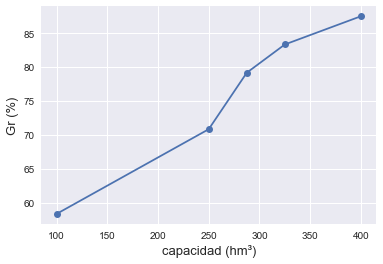

In [33]:
# Aplicar Newton-Raphson
obj = 0.8
error = 0.01
i = 0
while abs(Gr[-1] - obj) > error:
    if (Gr[-1] - obj) * (Gr[-2] - obj) < 0:
        Vn.append((Vn[-1] + Vn[-2]) / 2)
    elif (Gr[-1] - obj) * (Gr[-3] - obj) < 0:
        Vn.append((Vn[-1] + Vn[-3]) / 2)
    df, gr = regulacion(data32.aportacion, data32.demanda, Vn[-1], 0)
    Gr.append(gr)
    print('Vn = {0:.1f} hm³\tGr = {1:.2f} %'.format(Vn[-1], Gr[-1] * 100))
    i += 1

VGr = pd.concat((pd.Series(Vn), pd.Series(Gr)), axis=1)
VGr.columns = ['Vn', 'Gr']
VGr.sort_values('Vn', inplace=True)
plt.plot(VGr.Vn, VGr.Gr * 100, marker='o')
plt.xlabel('capacidad (hm³)', fontsize=13)
plt.ylabel('Gr (%)', fontsize=13);

El dimensionamiento del embalse tampoco cambia con la nueva serie.

## <font color=steelblue>Ejercicio 4
<font color=steelblue>Las aportaciones mensuales de un año promedio en una sercción de un río son las dadas en la tabla 3. Ante unas demandas previas de:
*  45 hm³/mes de octubre a febrero.
*  55 hm³/mes de marzo a mayo.
*  65 hm³/mes de junio a septiembre.

Se pide calcular.
*  Asumiendo que no existe embalse alguno, los volúmenes de agua no utilizados y las garantías de regulación y suministro.
*  Asumiendo que existe un embalse de 500 hm³ lleno hasta la mitad al comienzo del periodo, el volumen de agua no utilizado y las garantías de regulación y suministro.
*  El volumen de embalse necesario para conseguir una garantía del 100% tanto con vertido como sin vertido.

_**Tabla 3**. Serie de aportaciones mensuales en la sección del río en hm³._

| mes | apor. | | mes | apor. |
|-----|-------| |-----|-------|
| oct | 65    | | abr | 90    |
| nov | 80    | | may | 105   |
| dic | 88    | | jun | 90    |
| ene | 50    | | jul | 39    |
| feb | 40    | | ago | 20    |
| mar | 35    | | sep | 30    |

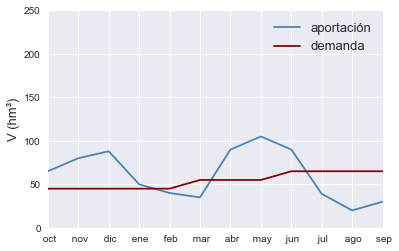

In [34]:
# series de aportación y demanda
data4 = pd.read_csv('Tabla 3.csv', index_col=0)
data4['demanda'] = [45, 45, 45, 45, 45, 55, 55, 55, 65, 65, 65, 65]

plt.plot(data4.aportacion, color='steelblue', label='aportación')
plt.plot(data4.demanda, color='maroon', label='demanda')

plt.xlim(0, 11)
plt.ylim(0, 250)
plt.ylabel('V (hm³)', fontsize=13)
plt.legend(fontsize=13);

### Sin embalse

In [35]:
data41 = data4.copy()
data41['servido'] = 0
data41['vertido'] = 0
data41['deficit'] = 0
for mes in data41.index:
    A, D = data41.loc[mes, 'aportacion'], data41.loc[mes, 'demanda']
    if A >= D:
        data41.loc[mes, 'servido'] = D
        data41.loc[mes, 'vertido'] = A - D
    else:
        data41.loc[mes, 'servido'] = A
        data41.loc[mes, 'deficit'] = D - A

In [36]:
# volumen de agua no utilizado
Vu = data41.vertido.sum()
print('volumen de agua no utilizado: {0:.2f} hm³'.format(Vu))

volumen de agua no utilizado: 213.00 hm³


In [37]:
n_deficit = (data41.deficit > 0).sum()
Gr = 1 - n_deficit / data41.shape[0]
print('garantía de regulación: {0:.2f} %'.format(Gr * 100))

garantía de regulación: 58.33 %


In [38]:
Vvertido = data41.vertido.sum()
Gs = 1 - Vvertido / data41.demanda.sum()
print('garantía de suministro: {0:.2f} %'.format(Gs * 100))

garantía de suministro: 67.23 %


### Embalse de 50 hm³

In [39]:
# capacidad del embalse y volumen embalsado al inicio
Vc = 50 
Vo = Vc / 2

In [40]:
data42 = data4.copy()
data42.index = np.arange(1, data42.shape[0] + 1)

data42, Gr = regulacion(data42.aportacion, data42.demanda, Vc, Vo)

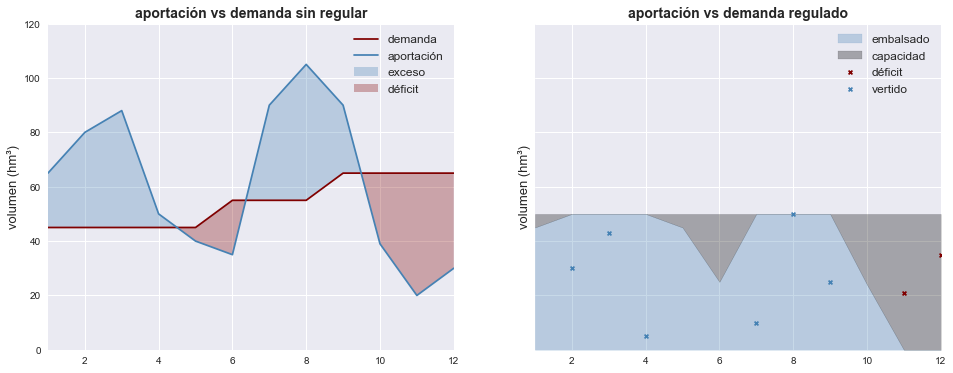

In [41]:
plot_embalse(data42, Vc, round=20)

In [42]:
# volumen de agua no utilizado
Vu = data42.vertido.sum()
n_years = int(data42.shape[0] / 12)
print('volumen de agua no utilizado: {0:.2f} hm³'.format(Vu / n_years))

volumen de agua no utilizado: 163.00 hm³


In [43]:
n_deficit = (data42.deficit > 0).sum()
Gr = 1 - n_deficit / data42.shape[0]
print('garantía de regulación: {0:.2f} %'.format(Gr * 100))

garantía de regulación: 83.33 %


In [44]:
Vvertido = data42.vertido.sum()
Gs = 1 - Vvertido / data42.demanda.sum()
print('garantía de suministro: {0:.2f} %'.format(Gs * 100))

garantía de suministro: 74.92 %


### Dimensionar el embalse

In [45]:
# valor objetivo de garantía
obj = 1
# valores secuenciales del volumen
Vs = np.arange(50, 200, 1)

# cálculo sucesivo de volumen hasta cumplir el objetivo
for V in Vs:
    data43, Gr = regulacion(data42.aportacion, data42.demanda, V, Vo)
    print('Vn = {0:.1f} hm³\tGr = {1:.2f} %'.format(V, Gr * 100))
    if Gr == obj:
        Vc = V
        break

Vn = 50.0 hm³	Gr = 83.33 %
Vn = 51.0 hm³	Gr = 83.33 %
Vn = 52.0 hm³	Gr = 83.33 %
Vn = 53.0 hm³	Gr = 83.33 %
Vn = 54.0 hm³	Gr = 83.33 %
Vn = 55.0 hm³	Gr = 83.33 %
Vn = 56.0 hm³	Gr = 83.33 %
Vn = 57.0 hm³	Gr = 83.33 %
Vn = 58.0 hm³	Gr = 83.33 %
Vn = 59.0 hm³	Gr = 83.33 %
Vn = 60.0 hm³	Gr = 83.33 %
Vn = 61.0 hm³	Gr = 83.33 %
Vn = 62.0 hm³	Gr = 83.33 %
Vn = 63.0 hm³	Gr = 83.33 %
Vn = 64.0 hm³	Gr = 83.33 %
Vn = 65.0 hm³	Gr = 83.33 %
Vn = 66.0 hm³	Gr = 83.33 %
Vn = 67.0 hm³	Gr = 83.33 %
Vn = 68.0 hm³	Gr = 83.33 %
Vn = 69.0 hm³	Gr = 83.33 %
Vn = 70.0 hm³	Gr = 83.33 %
Vn = 71.0 hm³	Gr = 91.67 %
Vn = 72.0 hm³	Gr = 91.67 %
Vn = 73.0 hm³	Gr = 91.67 %
Vn = 74.0 hm³	Gr = 91.67 %
Vn = 75.0 hm³	Gr = 91.67 %
Vn = 76.0 hm³	Gr = 91.67 %
Vn = 77.0 hm³	Gr = 91.67 %
Vn = 78.0 hm³	Gr = 91.67 %
Vn = 79.0 hm³	Gr = 91.67 %
Vn = 80.0 hm³	Gr = 91.67 %
Vn = 81.0 hm³	Gr = 91.67 %
Vn = 82.0 hm³	Gr = 91.67 %
Vn = 83.0 hm³	Gr = 91.67 %
Vn = 84.0 hm³	Gr = 91.67 %
Vn = 85.0 hm³	Gr = 91.67 %
Vn = 86.0 hm³	Gr = 91.67 %
V

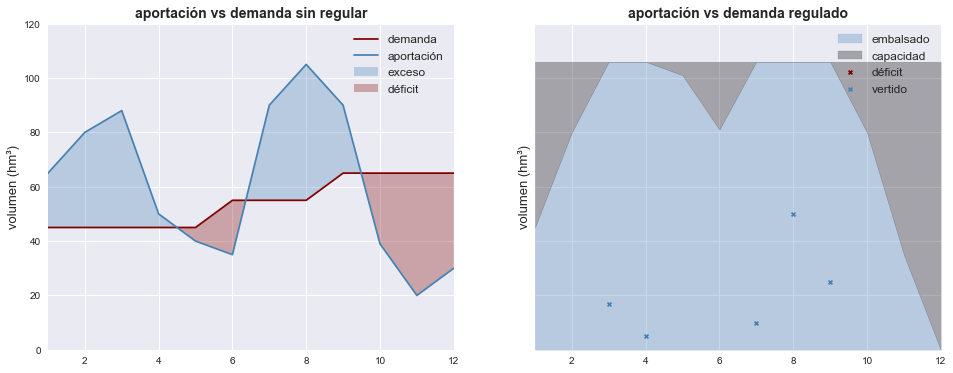

In [46]:
plot_embalse(data43, Vc, round=20)

## <font color=steelblue>Ejercicio 5
<font color=steelblue>A un embalse de 10 hm³ de capacidad, inicialmente vacío, llegan en un periodo de dos años consecutivos las aportaciones mensuales mostradas en la tabla 4. El embalse se pretende utilizar para el abastecimiento de una población (demanda constante de 4 hm³/mes) y para riego (consumo de 2 hm³/mes de octubre a marzo y de 6 hm³/mes de abril a septiembre. Se pide calcular:

*  Los vertidos con sus periodos, así como los déficit mensuales con las correspondientes garantías para la demanda conjunta.
*  A partir de los déficit mensuales obtenidos en el apartado anterior, las garantías de regulación de cada una de las demandas, asumiendo la prioridad del riego.
*  El volumen de embalse necesario para conseguir una garantía del 100% tanto con vertido como sin vertido.

_**Tabla 4**. Serie de aportaciones mensuales al embalse en hm³._

| mes | año 1 | año 2 |
|-----|-------|-------|
| oct | 3  | 2 |
| nov | 7 | 12  |
| dic | 10 | 8  |
| ene | 6  | 19  |
| feb | 13 | 19  |
| mar | 18 | 29 |
| abr | 17 | 15  |
| may | 8  | 9  |
| jun | 13  | 6  |
| jul | 4  | 2  |
| ago | 1  | 1   |
| sep | 2  | 2   |

In [47]:
# capacidad y volumen inicial del embalse (hm³)
Vc = 10
Vo = 0

In [48]:
# aportación
aportacion = pd.read_csv('Tabla 4.csv', index_col=0, encoding='latin-1')
aportacion.columns = [1, 2]
aportacion = pd.concat((aportacion[1], aportacion[2]), axis=0)
aportacion.index = np.arange(1, aportacion.shape[0] + 1)

In [49]:
# demanda de la población
demanda_p = [4] * aportacion.shape[0]
demanda_p = pd.Series(demanda_p, index=np.arange(1, len(demanda_p) + 1))

In [50]:
# demanda de riego
demanda_r = ([2] * 6 + [6] * 6) * int(aportacion.shape[0] / 12)
demanda_r = pd.Series(demanda_r, index=np.arange(1, len(demanda_r) + 1))

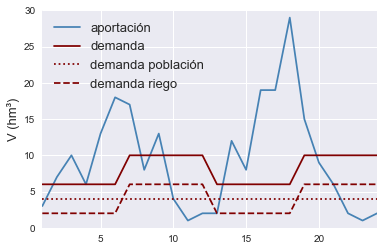

In [51]:
# data frame con las series de aportación y demandas
data5 = pd.concat((aportacion, demanda_p, demanda_r), axis=1)
data5.columns = ['aportacion', 'demanda_p', 'demanda_r']
data5['demanda'] = data5.demanda_p + data5.demanda_r

plt.plot(data5.aportacion, color='steelblue', label='aportación')
plt.plot(data5.demanda, color='maroon', label='demanda')
plt.plot(data5.demanda_p, ':', color='maroon', label='demanda población')
plt.plot(data5.demanda_r, '--', color='maroon', label='demanda riego')

plt.xlim(1, 24)
plt.ylim(0, 30)
plt.ylabel('V (hm³)', fontsize=13)
plt.legend(fontsize=13);

### Demanda conjunta

In [52]:
# calcular la regulación del embalse
data51, Gr = regulacion(data5.aportacion, data5.demanda, Vc, Vo)

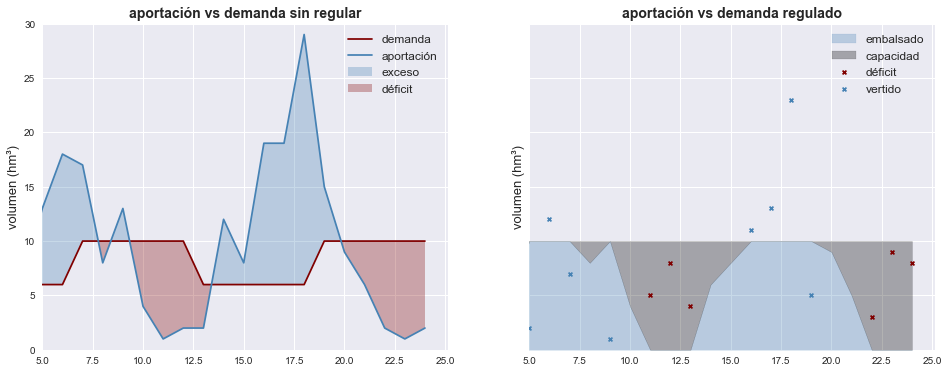

In [53]:
plot_embalse(data51, Vc, round(5))

In [54]:
nvertido = (data51.vertido > 0).sum()
print('nº meses con vertido: {0}'.format(nvertido))
Vvertido = data51.vertido.sum()
print('volumen vertido: {0:.1f} hm³'.format(Vvertido))

nº meses con vertido: 8
volumen vertido: 74.0 hm³


In [55]:
ndeficit = (data51.deficit > 0).sum()
print('nº meses con deficit: {0}'.format(ndeficit))
Vdeficit = data51.deficit.sum()
print('volumen deficit: {0:.1f} hm³'.format(Vdeficit))

nº meses con deficit: 7
volumen deficit: 40.0 hm³


In [56]:
Gr = 1 - ndeficit / data51.shape[0]
print('garantía de regulación: {0:.2f} %'.format(Gr * 100))
Gs = 1 - Vdeficit / data51.demanda.sum()
print('garantía de suministro: {0:.2f} %'.format(Gs * 100))

garantía de regulación: 70.83 %
garantía de suministro: 79.17 %


### Demandas independientes

In [57]:
# calcular la explotación del embalse
data52 = data5.loc[:, ['aportacion', 'demanda_r', 'demanda_p']].copy()
data52['embalsado'] = data51.embalsado
data52['vertido'] = data51.vertido
data52['deficit'] = data51.deficit
data52['deficit_r'] = 0
data52['deficit_p'] = 0

for mes in data52[data52.deficit > 0].index:
    A = data52.loc[mes, 'aportacion']
    Dp, Dr = data52.loc[mes, 'demanda_p'], data52.loc[mes, 'demanda_r']
    if A < Dr:
        data52.loc[mes, 'deficit_r'] = Dr - A
        data52.loc[mes, 'deficit_p'] = Dp
    else:
        data52.loc[mes, 'deficit_p'] = Dp - (A - Dr)

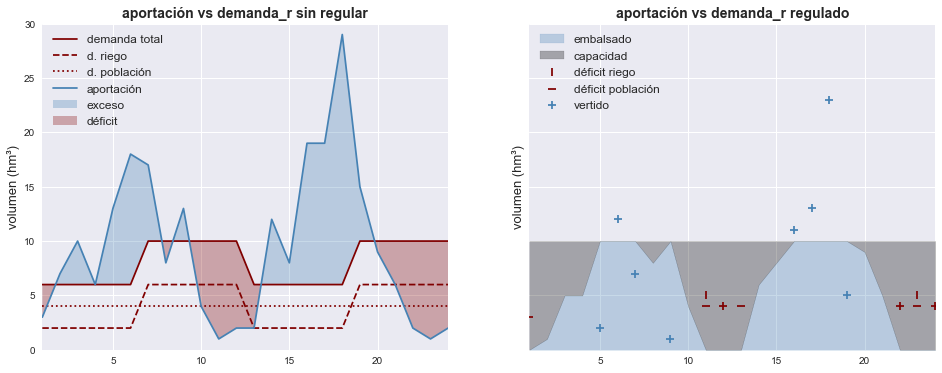

In [58]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6), sharex=True, sharey=True)

ax[0].plot(data5.demanda, c='maroon', label='demanda total')
ax[0].plot(data52.demanda_r, '--', c='maroon', label='d. riego')
ax[0].plot(data52.demanda_p, ':', c='maroon', label='d. población')
ax[0].plot(data52.aportacion, c='steelblue', label='aportación')
x, y1, y2 = data52.index, data5.demanda, data52.aportacion
ax[0].fill_between(x, y1, y2, where=y2 >= y1, interpolate=True,
                   facecolor='steelblue', alpha=0.3, label='exceso')
ax[0].fill_between(x, y1, y2, where=y2 <= y1, interpolate=True,
                   facecolor='maroon', alpha=0.3, label='déficit')
ax[0].set(xlim=(1, data52.shape[0]), ylim=(0, 30))
ax[0].set_ylabel('volumen (hm³)', fontsize=13)
ax[0].legend(fontsize=12)
ax[0].set_title('aportación vs demanda_r sin regular', fontsize=14,
               fontweight='bold')


ax[1].fill_between(data52.index, data52.embalsado, label='embalsado',
                   color='steelblue', alpha=0.3)
ax[1].fill_between(data52.index, data52.embalsado, Vc, label='capacidad',
                   color='k', alpha=0.3)
deficit_r = data52.deficit_r[data52.deficit_r > 0]
ax[1].scatter(deficit_r.index, deficit_r, s=50, marker='|', c='maroon',
              label='déficit riego')
deficit_p = data52.deficit_p[data52.deficit_p > 0]
ax[1].scatter(deficit_p.index, deficit_p, s=50, marker='_', c='maroon',
              label='déficit población')
vertido = data52.vertido[data52.vertido > 0]
ax[1].scatter(vertido.index, vertido, s=50, marker='+', c='steelblue',
              label='vertido')
ax[1].set_ylabel('volumen (hm³)', fontsize=13)
ax[1].set_title('aportación vs demanda_r regulado', fontsize=14,
               fontweight='bold')
ax[1].legend(fontsize=12);

In [59]:
ndeficit_r = (data52.deficit_r > 0).sum()
Gr = 1 - ndeficit_r / data52.shape[0]
print('garantía de regulación del riego: {0:.2f} %'.format(Gr * 100))
Vdeficit_r = data52.deficit_r.sum()
Gs = 1 - Vdeficit_r / data52.demanda_r.sum()
print('garantía de suministro del riego: {0:.2f} %'.format(Gs * 100))

garantía de regulación del riego: 79.17 %
garantía de suministro del riego: 77.08 %


In [60]:
ndeficit_p = (data52.deficit_p > 0).sum()
Gr = 1 - ndeficit_p / data52.shape[0]
print('garantía de regulación de la población: {0:.2f} %'.format(Gr * 100))
Vdeficit_p = data52.deficit_p.sum()
Gs = 1 - Vdeficit_p / data52.demanda_p.sum()
print('garantía de suministro de la población: {0:.2f} %'.format(Gs * 100))

garantía de regulación de la población: 70.83 %
garantía de suministro de la población: 71.88 %


### Dimensionar embalse

In [61]:
# generar una serie de aportación de 6 años
aportacion = pd.concat([data5.aportacion] * 3)
aportacion.index = np.arange(1, aportacion.shape[0] + 1)
aportacion.shape

(72,)

In [62]:
# generar una serie de demanda de 6 años
demanda = pd.concat([data5.demanda] * 3)
demanda.index = np.arange(1, demanda.shape[0] + 1)
demanda.shape

(72,)

In [63]:
# objetivo de garantía
obj = 1
# serie creciende de valores de la capacidad del embalse
Vs = np.arange(10, 100, 2)

# calcular secuencialmente la garantía hasta cumplir el objetivo
for V in Vs:
    data53, Gr = regulacion(aportacion, demanda, V, Vo)
    print('Vn = {0:.0f} hm³\tGr = {1:.2f} %'.format(V, Gr * 100))
    if abs(Gr - obj) < 0.02:
        Vc = V
        break

Vn = 10 hm³	Gr = 70.83 %
Vn = 12 hm³	Gr = 70.83 %
Vn = 14 hm³	Gr = 75.00 %
Vn = 16 hm³	Gr = 79.17 %
Vn = 18 hm³	Gr = 79.17 %
Vn = 20 hm³	Gr = 79.17 %
Vn = 22 hm³	Gr = 83.33 %
Vn = 24 hm³	Gr = 87.50 %
Vn = 26 hm³	Gr = 87.50 %
Vn = 28 hm³	Gr = 91.67 %
Vn = 30 hm³	Gr = 95.83 %
Vn = 32 hm³	Gr = 95.83 %
Vn = 34 hm³	Gr = 98.61 %


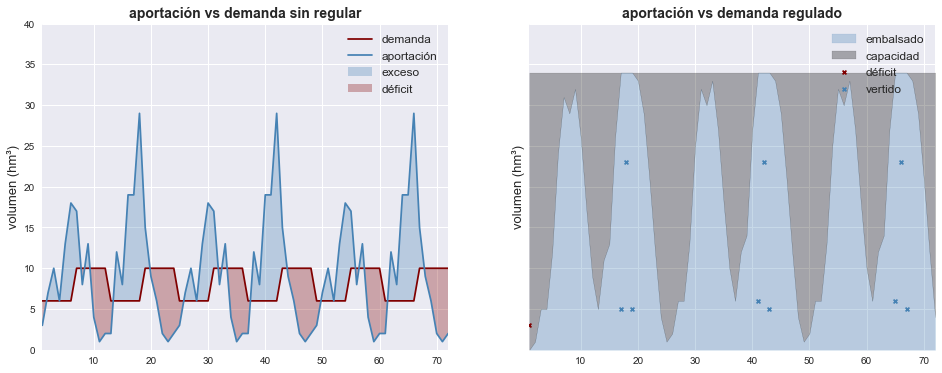

In [65]:
plot_embalse(data53, Vc, round=10)

No se alcanza la garantía del 100% porque no es posible servir el primer mes de la serie si la condición inicial es embalse vacío. Sin embargo, con el volumen calculado, se consigue que el embalse no se vacíe al final de cada ciclo bianual, con lo que se evita el déficit en octubre.

## <font color=steelblue>Ejercicio 6
<font color=steelblue>Realiza una caracterización de la sequía para la información climática proporcionada en Moodle utilizando los índices SPI y SPEI. Explica el procedimiento utilizado y compara los resultados obtenidos.

Discute la capacidad de ambos índices de capturar los posibles impactos de la sequía, destacando aquellos que no pueden capturar. ¿Qué características debería incluir un índice que sí fuese capaz de capturar dichos impactos? Se valorará la discusión de otros índices presentes en la literatura técnica y científica que puedan incluir características no capturadas por el SPI y el SPEI.

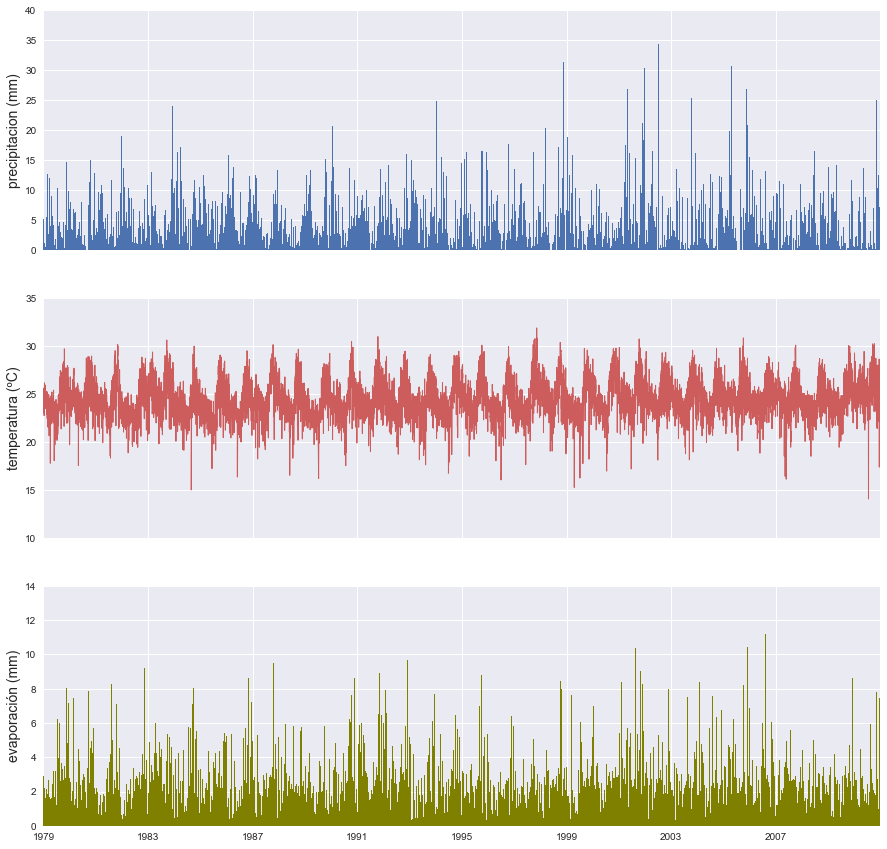

In [66]:
# cargar datos
data6 = pd.read_csv('Datos_Climaticos.csv', parse_dates=True, index_col=0)

fig, ax = plt.subplots(nrows=3, figsize=(15, 15), sharex=True)

ax[0].bar(data6.index, data6.Precp, width=1)
ax[0].set_xlim(data6.index[0], data6.index[-1])
ax[0].set_ylim(0, 40)
ax[0].set_ylabel('precipitacion (mm)', fontsize=14)

ax[1].plot(data6.Temp, color='indianred', linewidth=1)
ax[1].set_ylim(10, 35)
ax[1].set_ylabel('temperatura (ºC)', fontsize=14)

ax[2].bar(data6.index, data6.Evap, color='olive', width=1)
ax[2].set_ylim(0, 14)
ax[2].set_ylabel('evaporación (mm)', fontsize=14);

### Standard precipitation index: SPI

El SPI es un índice de sequía basado únicamente en la precipitación, por lo que sólo es capaz de predecir la sequía meteorológico. Dentro de sus ventajas está que puede calcularse para distintas agregaciones temporales (1-3-6-12-24 meses), con lo que se pueden identificar sequías de diversa duración.

In [67]:
import scipy.stats as stats

#### Anual

In [68]:
# serie de medias mensuales
data6am = data6.groupby(data6.index.year).mean()
data6am.index = pd.date_range(data6.index[0], data6.index[-1], freq='A')
data6am.head()

,Precp,Temp,Evap
1979-12-31,5.808543,24.156272,3.045270
1980-12-31,5.522678,24.587658,3.298330
1981-12-31,5.985808,24.165920,3.032393
1982-12-31,6.259732,23.700937,2.751669
1983-12-31,5.514103,25.214928,3.502350


In [69]:
# ajustar la función de distribución gamma
serie = data6am.Precp
alpha, loc, beta = stats.gamma.fit(serie, floc=0)
print('alpha = {0:.3f}\tloc = {1:.3f}\tbeta = {2:.3f}'.format(alpha, loc,
                                                              beta))

alpha = 249.043	loc = 0.000	beta = 0.023


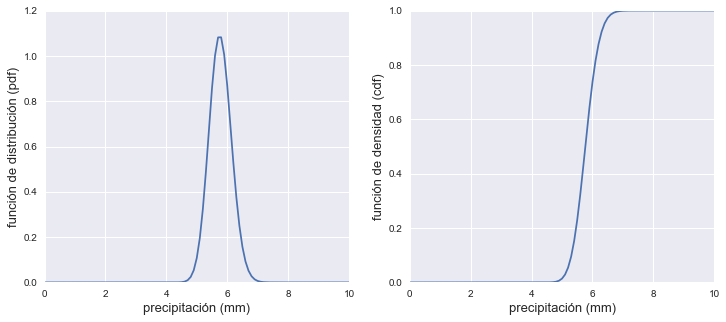

In [70]:
# plotear la función de distribución y de densidad de la gamma ajustada
pcps = np.arange(0, 20, 0.1)
pdf_gamma = stats.gamma.pdf(pcps, alpha, loc, scale=beta)
cdf_gamma = stats.gamma.cdf(pcps, alpha, loc, scale=beta)

fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharex=True)

# función de distribución
ax[0].plot(pcps, pdf_gamma)
ax[0].set(xlim=(0, 10), ylim=(0, 1.2))
ax[0].set_xlabel('precipitación (mm)', fontsize=13)
ax[0].set_ylabel('función de distribución (pdf)', fontsize=13)

# función de densidad
ax[1].plot(pcps, cdf_gamma)
ax[1].set(ylim=(0, 1))
ax[1].set_xlabel('precipitación (mm)', fontsize=13)
ax[1].set_ylabel('función de densidad (cdf)', fontsize=13);

Seguidamente se calcula, a modo de ejemplo, el SPI para un año aleatorio (en este caso el 11 dato de la serie). En el gráfico más abajo se explica de manera visual cuál es el procedimiento. Se calcula la probabilidad de no excendencia del dato de la serie según la distribución gamma; para dicho valor de probabilidad, se extrae de la normal el valor que generaría dicha probabilidad; dicho valor es el SPI.

In [71]:
# Calcular el SPI de un año concreto
pcp = data6am.Precp[10]
cdf = stats.gamma.cdf(pcp, alpha, loc, beta)

SPI = stats.norm.ppf(cdf)
print('pcp = {0:.2f} mm/d \tcdf = {1:.3f}\tSPI = {2:.3f}'.format(pcp, cdf, SPI))

pcp = 5.55 mm/d 	cdf = 0.273	SPI = -0.604


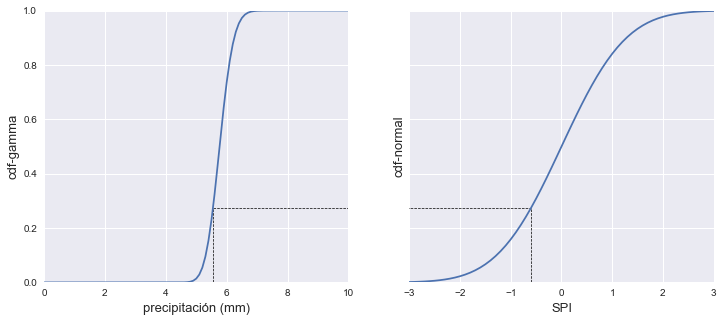

In [72]:
# plotear el método de cálculo
spis = np.arange(-5, 5, 0.1)
cdf_norm = stats.norm.cdf(spis, loc=0, scale=1)

fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

# función de distribución
ax[0].plot(pcps, cdf_gamma)
ax[0].vlines(pcp, 0, cdf, linestyle='--', linewidth=0.7)
ax[0].hlines(cdf, pcp, 20, linestyle='--', linewidth=0.7)
ax[0].set(xlim=(0, 10), ylim=(0, 1))
ax[0].set_xlabel('precipitación (mm)', fontsize=13)
ax[0].set_ylabel('cdf-gamma', fontsize=13)

# función de densidad
ax[1].plot(spis, cdf_norm)
ax[1].hlines(cdf, -10, SPI, linestyle='--', linewidth=0.7)
ax[1].vlines(SPI, 0, cdf, linestyle='--', linewidth=0.7)
ax[1].set(xlim=(-3, 3), ylim=(0, 1))
ax[1].set_xlabel('SPI', fontsize=13)
ax[1].set_ylabel('cdf-normal', fontsize=13);

In [73]:
# calcular el SPI para la serie anual
SPIy = pd.Series(index=data6am.index)

for year in data6am.index:
    pcp = data6am.loc[year, 'Precp']
    cdf = stats.gamma.cdf(pcp, alpha, loc, beta)
    SPIy[year] = stats.norm.ppf(cdf)

In [74]:
def plot_SPI(df, title):
    fig, ax = plt.subplots(figsize=(12, 5))

    ax.plot(df, color='k', linewidth=1.2)
    ax.fill_between(df.index, -3, -2, color='indianred', alpha=0.4,
                     label='sequía extrema')
    ax.fill_between(df.index, -2, -1.5, color='indianred', alpha=0.3,
                     label='sequía severa')
    ax.fill_between(df.index, -1.5, -1, color='indianred', alpha=0.2,
                     label='sequía moderada')
    ax.fill_between(df.index, -1, 0, color='indianred', alpha=0.1,
                     label='sequía ligera')
    ax.fill_between(df.index, 0, 1, color='steelblue', alpha=0.1,
                     label='húmedo ligero')
    ax.fill_between(df.index, 1, 1.5, color='steelblue', alpha=0.2,
                     label='húmedo moderado')
    ax.fill_between(df.index, 1.5, 2, color='steelblue', alpha=0.3,
                     label='húmedo severo')
    ax.fill_between(df.index, 2, 3, color='steelblue', alpha=0.4,
                     label='húmedo extremo')
    ax.set(xlim=(df.index[0], df.index[-1]), ylim=(-3, 3))
    ax.set_title(title, fontsize=14)
    fig.legend(loc=[0.15, 0], ncol=4, fontsize=11);

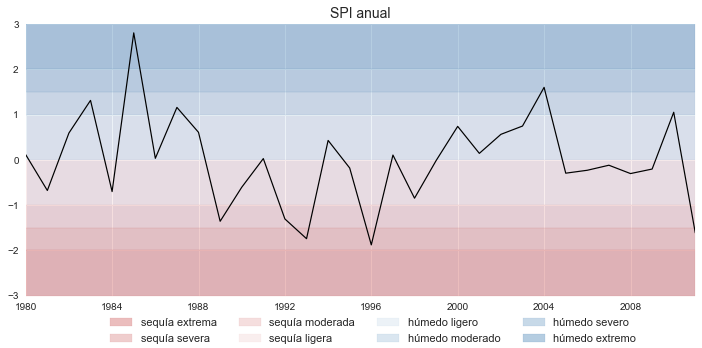

In [75]:
plot_SPI(SPIy, title='SPI anual')

#### Mensual

In [76]:
# serie de medias mensuales
# ========================
data6mm = data6.groupby([data6.index.year, data6.index.month]).mean()
data6mm.index = pd.date_range(data6.index[0], data6.index[-1], freq='M')
data6mm.head()

,Precp,Temp,Evap
1979-01-31,4.139810,24.502213,2.799417
1979-02-28,7.042907,24.106605,2.500249
1979-03-31,11.071502,23.324404,2.073358
1979-04-30,7.197525,23.032864,2.562896
1979-05-31,5.943776,23.270194,2.471684


In [77]:
# Ajustar la función gamma
# ========================
# Data frame donde guardar los parámetros de la gamma ajustada para cada mes
gamma = pd.DataFrame(index=np.arange(1, 13), columns=['alpha', 'loc', 'beta'])

for mes in gamma.index:
    # extraer datos de enero
    mask = data6mm.index.month == mes
    pcpmm = data6mm.loc[mask, 'Precp']

    # ajustar la función de distribución gamma
    gamma.loc[mes, :] = stats.gamma.fit(pcpmm)
gamma

,alpha,loc,beta
1,4.59645,3.10001,0.775469
2,1121.68,-31.8201,0.0355091
3,17.6747,4.11233,0.228326
4,308.974,-11.7039,0.061283
5,12.1997,1.36708,0.314183
6,10.2479,0.0546677,0.354447
7,2.60691,1.23523,0.686526
8,24.9753,-1.27837,0.165464
9,10.0988,1.88411,0.231403
10,364.41,-11.7084,0.0481724


In [78]:
# serie mensual de SPI
# ====================
SPIm = pd.Series(index=data6mm.index)

for idx in data6mm.index:
    mes = idx.month
    pcp = data6mm.loc[idx, 'Precp']
    cdf = stats.gamma.cdf(pcp, *gamma.loc[mes, :])
    SPIm[idx] = stats.norm.ppf(cdf)

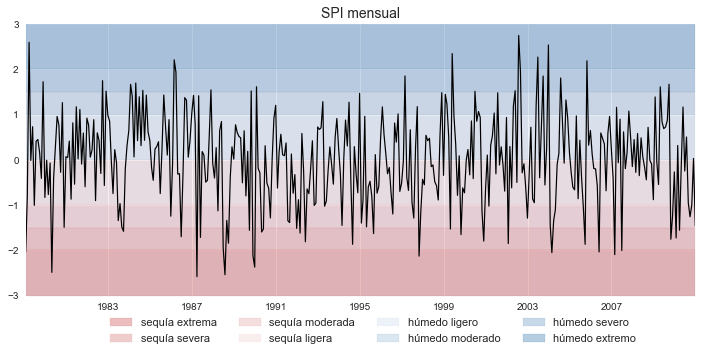

In [79]:
plot_SPI(SPIm, 'SPI mensual')

### Standard precipitation-evapotranspiration index: SPEI
El SPEI es un índice derivado del SPEI en el que se incluye la evapotranspiración, con la idea de crear un índice de sequía hidrológica al añadir más variables del ciclo hidrológico. Al igual que el SPI, permite analizar diversas agregaciones temporales, con lo que se pueden identificar sequías de diversa duración.
#### Anual

In [80]:
# variable a la que se aplica el SPEI: diferencia de preciptiación y
# evapotranspiración (D)
data6am['D'] = data6am.Precp - data6am.Evap

In [81]:
# ajustar la función de distribución gamma
alpha, loc, beta = stats.gamma.fit(data6am.D)
print('alpha = {0:.3f}\tloc = {1:.3f}\tbeta = {2:.3f}'.format(alpha, loc, beta))

alpha = 655.432	loc = -8.506	beta = 0.017


In [82]:
# serie anual de SPEI
SPEIy = pd.Series(index=data6am.index)

for year in data6am.index:
    D = data6am.loc[year, 'D']
    cdf = stats.gamma.cdf(D, alpha, loc, beta)
    SPEIy[year] = stats.norm.ppf(cdf)

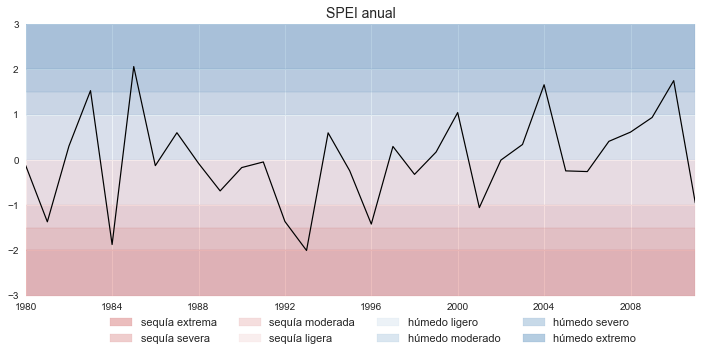

In [83]:
plot_SPI(SPEIy, 'SPEI anual')

#### Mensual

In [84]:
# variable a la que se aplica el SPEI: diferencia de preciptiación y
# evapotranspiración (D)
data6mm['D'] = data6mm.Precp - data6mm.Evap

In [85]:
# Ajustar la función gamma a cada mes
# Data frame donde guardar los parámetros de la gamma ajustada para cada mes
gammaD = pd.DataFrame(index=np.arange(1, 13), columns=['alpha', 'loc', 'beta'])

for mes in gammaD.index:
    # extraer datos de enero
    mask = data6mm.index.month == mes
    Dmm = data6mm.loc[mask, 'D']
    # ajustar la función de distribución gamma
    gammaD.loc[mes, :] = stats.gamma.fit(Dmm)
    
gammaD

,alpha,loc,beta
1,5.95662,-0.59134,0.760156
2,592.067,-29.6243,0.0591333
3,145.183,-8.70831,0.0994067
4,306.416,-13.7937,0.0608846
5,13.4702,-1.33407,0.305745
6,6.71468,-1.65147,0.439234
7,2.486,-1.09485,0.588269
8,2034.15,-29.2168,0.0141723
9,1.93141,-0.679229,0.571496
10,27.511,-3.73066,0.201514


In [86]:
# serie mensual de SPEI
SPEIm = pd.Series(index=data6mm.index)

for idx in data6mm.index:
    mes = idx.month
    D = data6mm.loc[idx, 'D']
    cdf = stats.gamma.cdf(D, *gammaD.loc[mes, :])
    SPEIm[idx] = stats.norm.ppf(cdf)

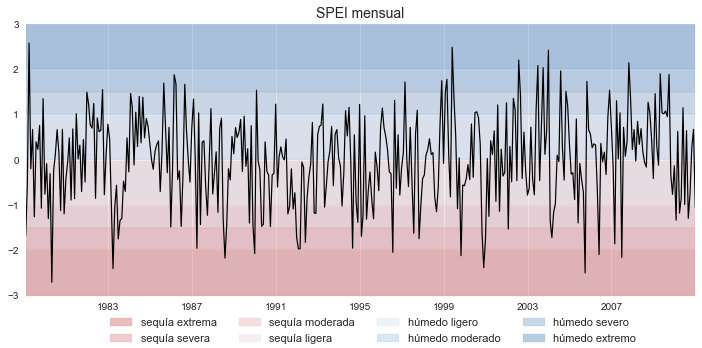

In [87]:
plot_SPI(SPEIm, 'SPEI mensual')

#### Comparación de métodos y agregaciones

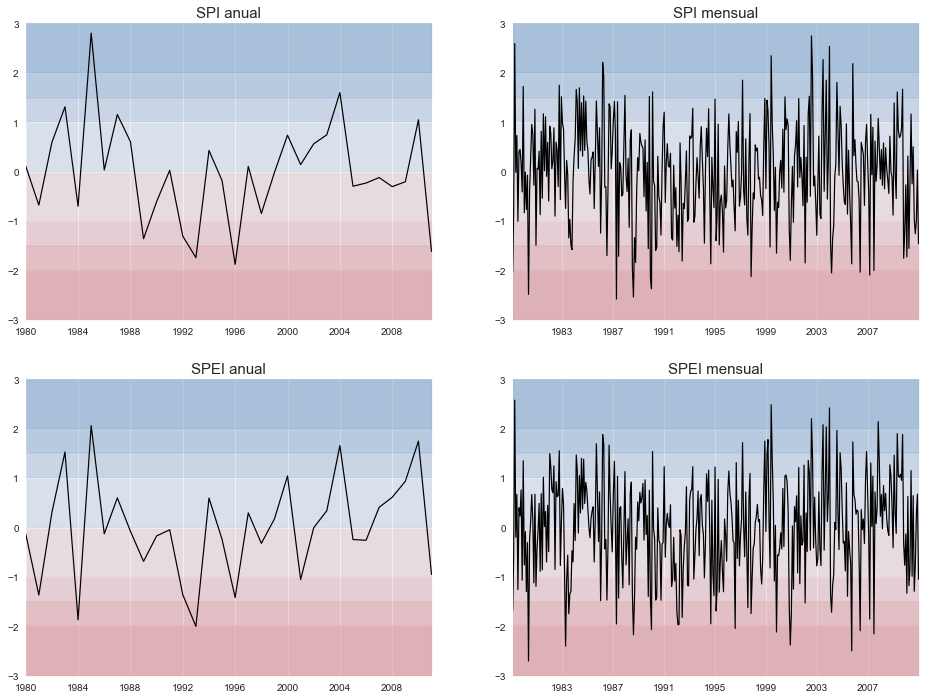

In [88]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 12))

for i in np.arange(0, 4):
    r, c = int(i / 2), i % 2
    if i == 0:
        serie = SPIy
        title = 'SPI anual'
    elif i == 1:
        serie = SPIm
        title = 'SPI mensual'
    elif i == 2:
        serie = SPEIy
        title = 'SPEI anual'
    elif i == 3:
        serie = SPEIm
        title = 'SPEI mensual'
    
    axes[r,c].plot(serie, color='k', linewidth=1.2)
    axes[r,c].fill_between(serie.index, -3, -2, color='indianred', alpha=0.4,
                     label='sequía extrema')
    axes[r,c].fill_between(serie.index, -2, -1.5, color='indianred', alpha=0.3,
                     label='sequía severa')
    axes[r,c].fill_between(serie.index, -1.5, -1, color='indianred', alpha=0.2,
                     label='sequía moderada')
    axes[r,c].fill_between(serie.index, -1, 0, color='indianred', alpha=0.1,
                     label='sequía ligera')
    axes[r,c].fill_between(serie.index, 0, 1, color='steelblue', alpha=0.1,
                     label='húmedo ligero')
    axes[r,c].fill_between(serie.index, 1, 1.5, color='steelblue', alpha=0.2,
                     label='húmedo moderado')
    axes[r,c].fill_between(serie.index, 1.5, 2, color='steelblue', alpha=0.3,
                     label='húmedo severo')
    axes[r,c].fill_between(serie.index, 2, 3, color='steelblue', alpha=0.4,
                     label='húmedo extremo')
    axes[r,c].set(xlim=(serie.index[0], serie.index[-1]), ylim=(-3, 3))
    axes[r,c].set_title(title, fontsize=15)
    

Por lo general, se entiende como sequía todo valor por debajo de *-1*. Según esto, el SPI identifica 5 sequías a escala anual, mientras que el SPEI identifica 6 años de sequía. Estos resultados indicarían una mayor sensibilidad del SPEI al incluir otra variables hidrológicas.

Además, los años en los que ocurren sequía no son coincidentes según los dos parámetros (sólo coinciden 1991, 92 y 95). Se debe a que el SPEI identifica como secos años en los que, a pesar de no haber sequía en cuanto a precipitacions, la alta temperatura y la consiguiente evapotranspiración convierten el año en seco. Por el contrario, el año 2010 es un año con sequía meteorológica (SPI), pero en el que la evapotranspiración fue baja y, por tanto, no se identifica sequía hidrológica.


Existen otros índices de sequía como el PDSI (_Palmer drought severity index_). Es uno de los índices más comúnmente usados, pero tiene el inconveniente de sólo poder ser usado a escala anual.

En general, los índices deben ser acordes al criterio de sequía de estudio. Por ejemplo, el SPI es un índice adecuado si el objeto de nuestro estudio es la sequía hidrológica; sin embargo, si nos interesa la sequía agrícola es necesario utilizar índices que incluyan otras variables como la humedad del suelo o factores económicos.